# Aprendizado de Máquina
__UFRJ-Macaé__

__Pedro Andrietta Chagas__

## Reconhecendo Letras

Primeiro precisamos importar as bibliotecas que iremos utilizar:

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import HTML
import seaborn as sns

from matplotlib.image import imread 
from PIL import Image

from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import KFold, train_test_split
from sklearn import cluster
import xgboost as xgb

In [74]:
def jupyter_settings():
    %matplotlib inline

    plt.style.use('bmh')
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24

    display(HTML('<style>.conteiner{width:100% !important;}</style>'))

    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option('display.expand_frame_repr', False)
    # configura o pandas para quantidade de casas decimeis
    pd.set_option('display.float_format', lambda x: '%.2f' % x)

    sns.set()
jupyter_settings()

### 1 - Coletar os dados

In [75]:
conjuntoDados = pd.read_csv('letter_data.csv')
conjuntoDados.drop(columns='Unnamed: 0', inplace=True)
conjuntoDados.label = conjuntoDados.label.astype(str)

/tmp/ipykernel_200730/1212308789.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  conjuntoDados = pd.read_csv('letter_data.csv')


### 2 - Explorar os dados

Vamos explorar algumas coisas no conjunto de dados:

1. Quantos exemplos o conjunto de dados possui?

In [76]:
num_exemplo = conjuntoDados['label'].count()
print(f'No conjunto de dados existem {num_exemplo} exemplos')

No conjunto de dados existem 3410 exemplos


2. Quantos exemplos cada classe possui?

In [77]:
num_classes = len(conjuntoDados.label.unique())
print(f'Existem {num_classes} classes distintas')

Existem 62 classes distintas


In [78]:
num_exemplo = int(conjuntoDados.label.value_counts().unique())
print(f'Cada classe possui {num_exemplo} exemplos')

Cada classe possui 55 exemplos


3. Quais são os dígitos que estamos tentando reconhecer?

In [79]:
print('Os dígitos são:')
print(conjuntoDados.label.unique())

Os dígitos são:
['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' 'A' 'B' 'C' 'D' 'E' 'F' 'G' 'H'
 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R' 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z'
 'a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o' 'p' 'q' 'r'
 's' 't' 'u' 'v' 'w' 'x' 'y' 'z']


In [80]:
maiusculas = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
conjuntoDados = conjuntoDados[conjuntoDados['label'].isin(maiusculas)].copy()

Vamos olhar um exemplo de cada dígito:

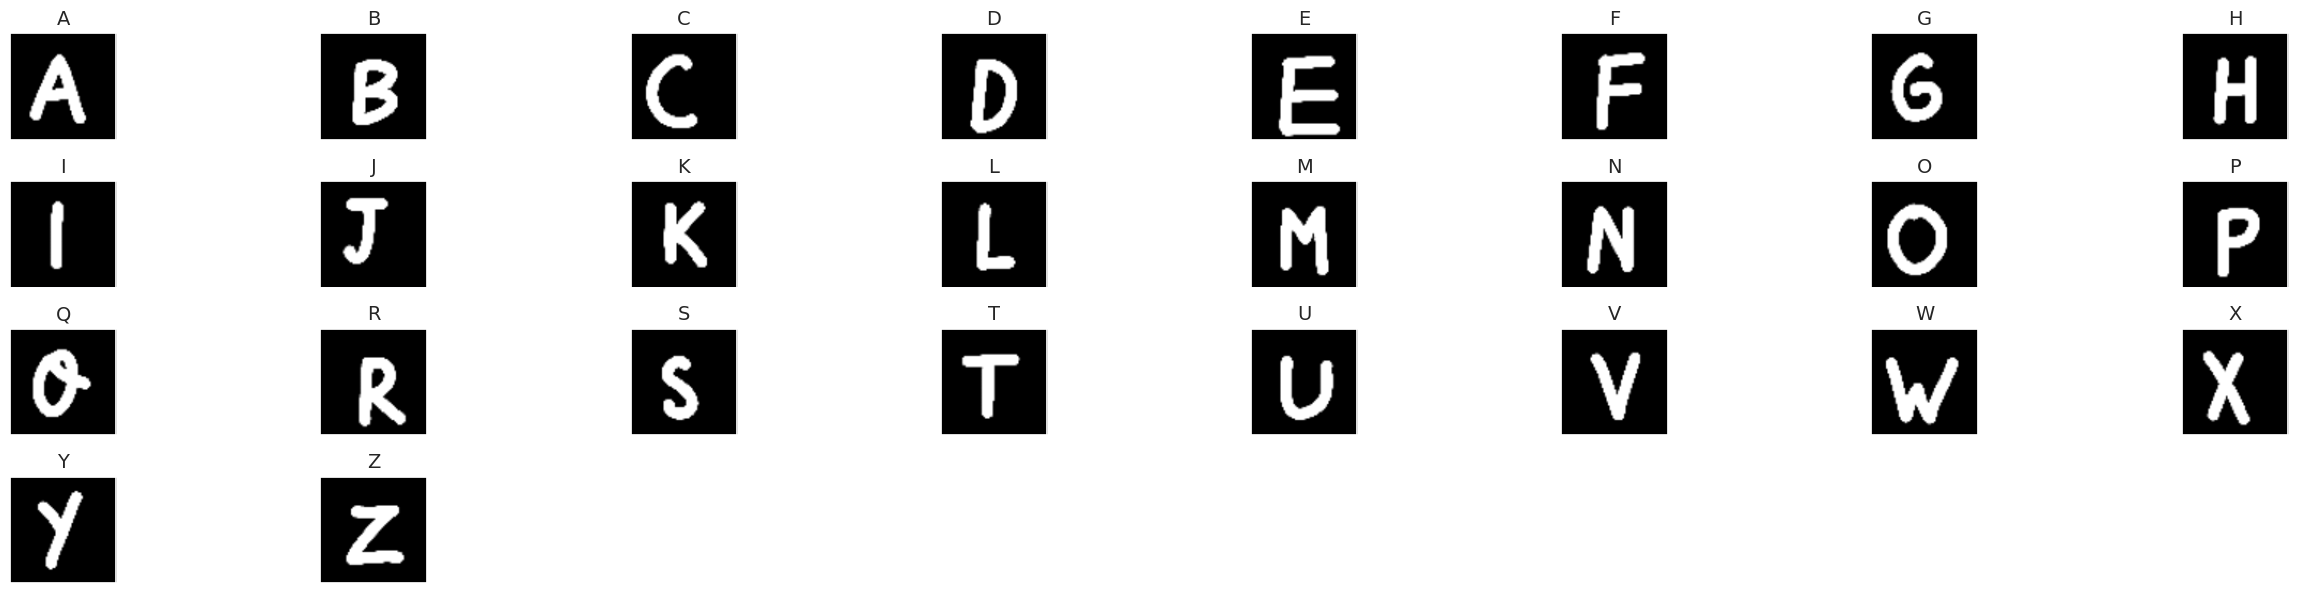

In [81]:
num_classes = len(conjuntoDados.label.unique())
classes = [i for i in conjuntoDados['label'].unique()]
for i, classe in enumerate(classes):
    img_data = conjuntoDados[conjuntoDados['label'] == classe].iloc[1,1:]
    plt.subplot(8, 8, 1 + i)
    plt.imshow(np.array(img_data.to_list()).reshape(100,100), cmap=plt.cm.binary)
    plt.title(classe, fontsize=14)
    ax= plt.gca()
    ax.get_yaxis().set_visible(False)
    ax.get_xaxis().set_visible(False)
plt.tight_layout()
plt.show()

### 3 - Construir/Escolher Modelo

Vamos usar o classificador *Support Vector Classifier* (SVC) e fazer separação linear

In [82]:
kernels = ['Polynomial', 'RBF', 'Sigmoid','Linear']#A function which returns the corresponding SVC model
def getClassifier(ktype):
    if ktype == 0:
        # Polynomial kernal
        return SVC(kernel='poly', degree=8, gamma="auto")
    elif ktype == 1:
        # Radial Basis Function kernal
        return SVC(kernel='rbf', gamma="auto")
    elif ktype == 2:
        # Sigmoid kernal
        return SVC(kernel='sigmoid', gamma="auto")
    elif ktype == 3:
        # Linear kernal
        return SVC(kernel='linear', gamma="auto")

### 4 - Treinar o Modelo

Primeiro vamos separar o conjunto de dados em dois: **80%** dos dados serão utilizados para o **treino** e **20%** para o **teste**

In [83]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

conjuntoDados.label = le.fit_transform(conjuntoDados.label)
training_data, testing_data = train_test_split(conjuntoDados, test_size=0.2, random_state=25)
treinoFeatures,treinoClasses = training_data.drop(columns='label').values, training_data['label'].values
testeFeatures,testeClasses = testing_data.drop(columns='label'), testing_data['label'].values

Agora iremos treinar o classificador com os dados de treino

In [84]:
#from sklearn.model_selection import GridSearchCV
#param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
#grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3, n_jobs=-1)
#grid.fit(treinoFeatures,treinoClasses)
#print(grid.best_estimator_)
params = {'C': 0.1, 'gamma': 1,'kernel': 'poly'}

In [85]:
model = SVC(**params)
model.fit(treinoFeatures,treinoClasses)

SVC(C=0.1, gamma=1, kernel='poly')

### 5 - Testar e avaliar os resultados

In [86]:
testePrevisao = model.predict(testeFeatures)
print(metrics.classification_report(testeClasses,testePrevisao))

/home/pedro/.local/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.50      0.67      0.57         6
           1       0.44      0.64      0.52        11
           2       0.67      0.77      0.71        13
           3       0.67      0.50      0.57        12
           4       0.73      0.79      0.76        14
           5       0.54      1.00      0.70         7
           6       0.53      0.69      0.60        13
           7       0.64      1.00      0.78         7
           8       0.64      0.64      0.64        11
           9       0.50      0.56      0.53         9
          10       0.54      0.58      0.56        12
          11       0.82      0.60      0.69        15
          12       0.75      0.82      0.78        11
          13       0.67      0.33      0.44        12
          14       0.53      0.75      0.62        12
          15       0.50      0.50      0.50         6
          16       0.86      0.55      0.67        11
          17       0.57    

<AxesSubplot:>

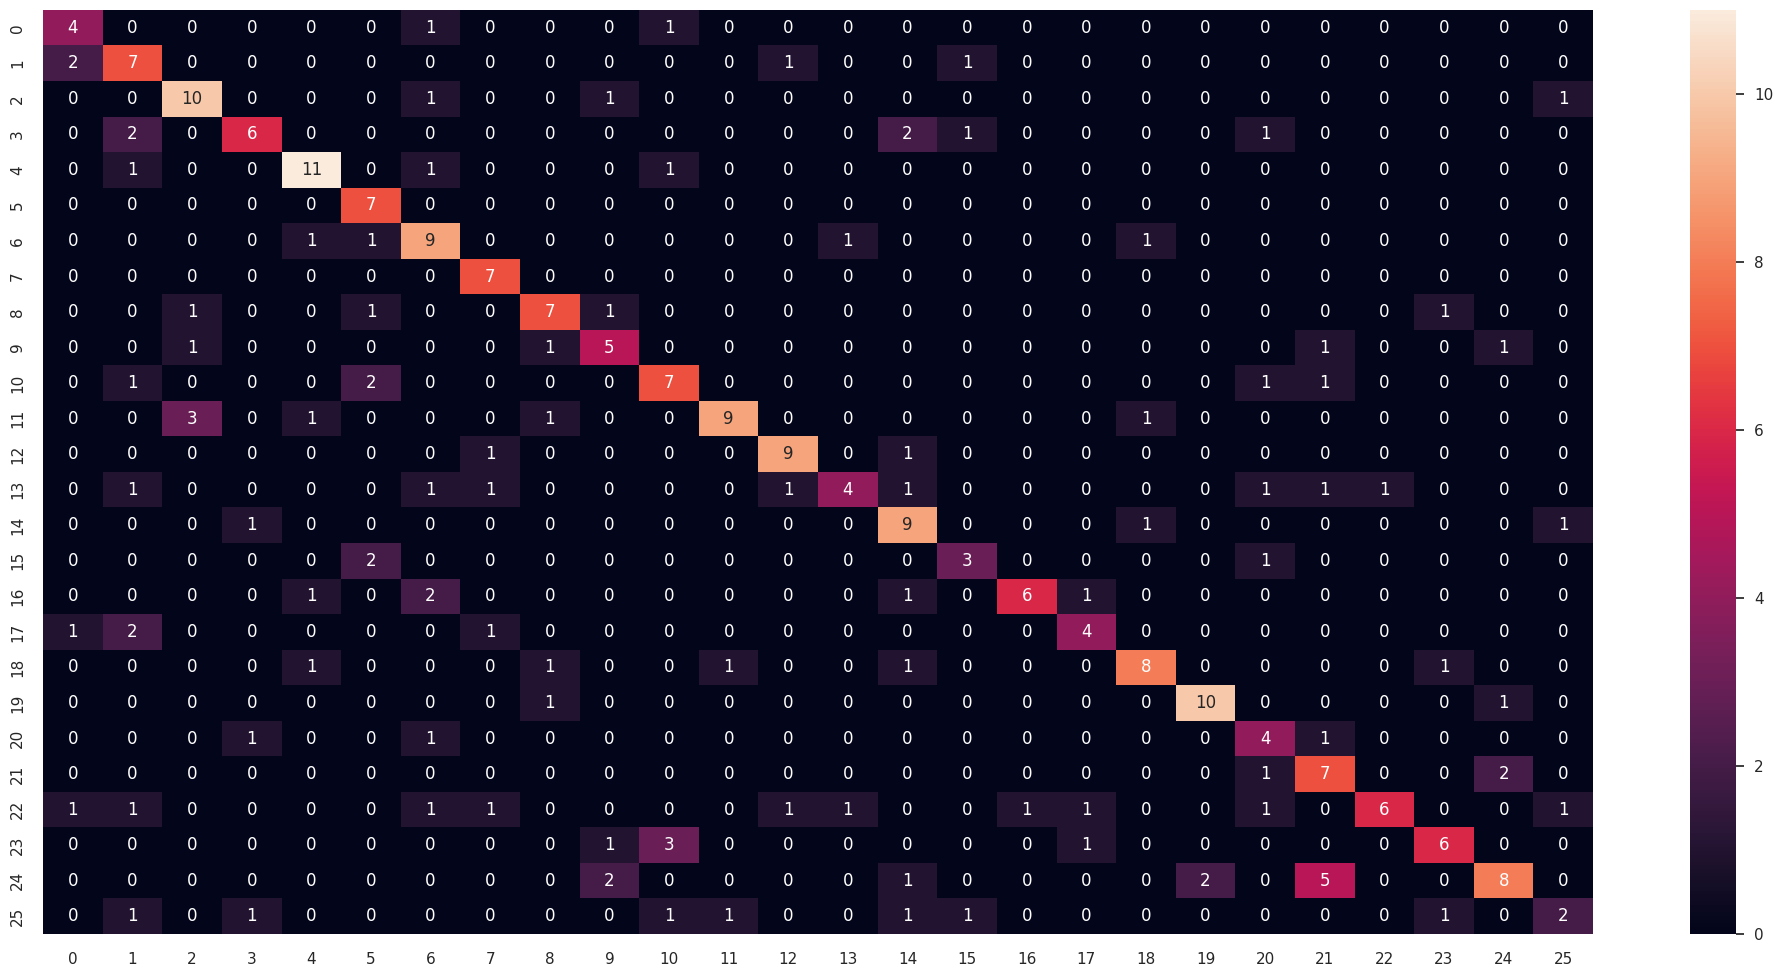

In [87]:
#Observa o resultado gerado pelo classificador
matrizConfusao = metrics.confusion_matrix(le.inverse_transform(testeClasses),le.inverse_transform(testePrevisao))
sns.heatmap(matrizConfusao, annot=True)

In [88]:
#Relatório de métricas
metricas = metrics.classification_report(le.inverse_transform(testeClasses),le.inverse_transform(testePrevisao))
print(metricas)

              precision    recall  f1-score   support

           A       0.50      0.67      0.57         6
           B       0.44      0.64      0.52        11
           C       0.67      0.77      0.71        13
           D       0.67      0.50      0.57        12
           E       0.73      0.79      0.76        14
           F       0.54      1.00      0.70         7
           G       0.53      0.69      0.60        13
           H       0.64      1.00      0.78         7
           I       0.64      0.64      0.64        11
           J       0.50      0.56      0.53         9
           K       0.54      0.58      0.56        12
           L       0.82      0.60      0.69        15
           M       0.75      0.82      0.78        11
           N       0.67      0.33      0.44        12
           O       0.53      0.75      0.62        12
           P       0.50      0.50      0.50         6
           Q       0.86      0.55      0.67        11
           R       0.57    

### Experimento 2 - K-Means Clustering (Não Supervisionado)

In [89]:
estimador = cluster.KMeans(n_clusters=num_classes)

treinoFeatures = conjuntoDados.iloc[:,1:]
clusters = estimador.fit_predict(treinoFeatures)
estimador.cluster_centers_.shape

(26, 10000)

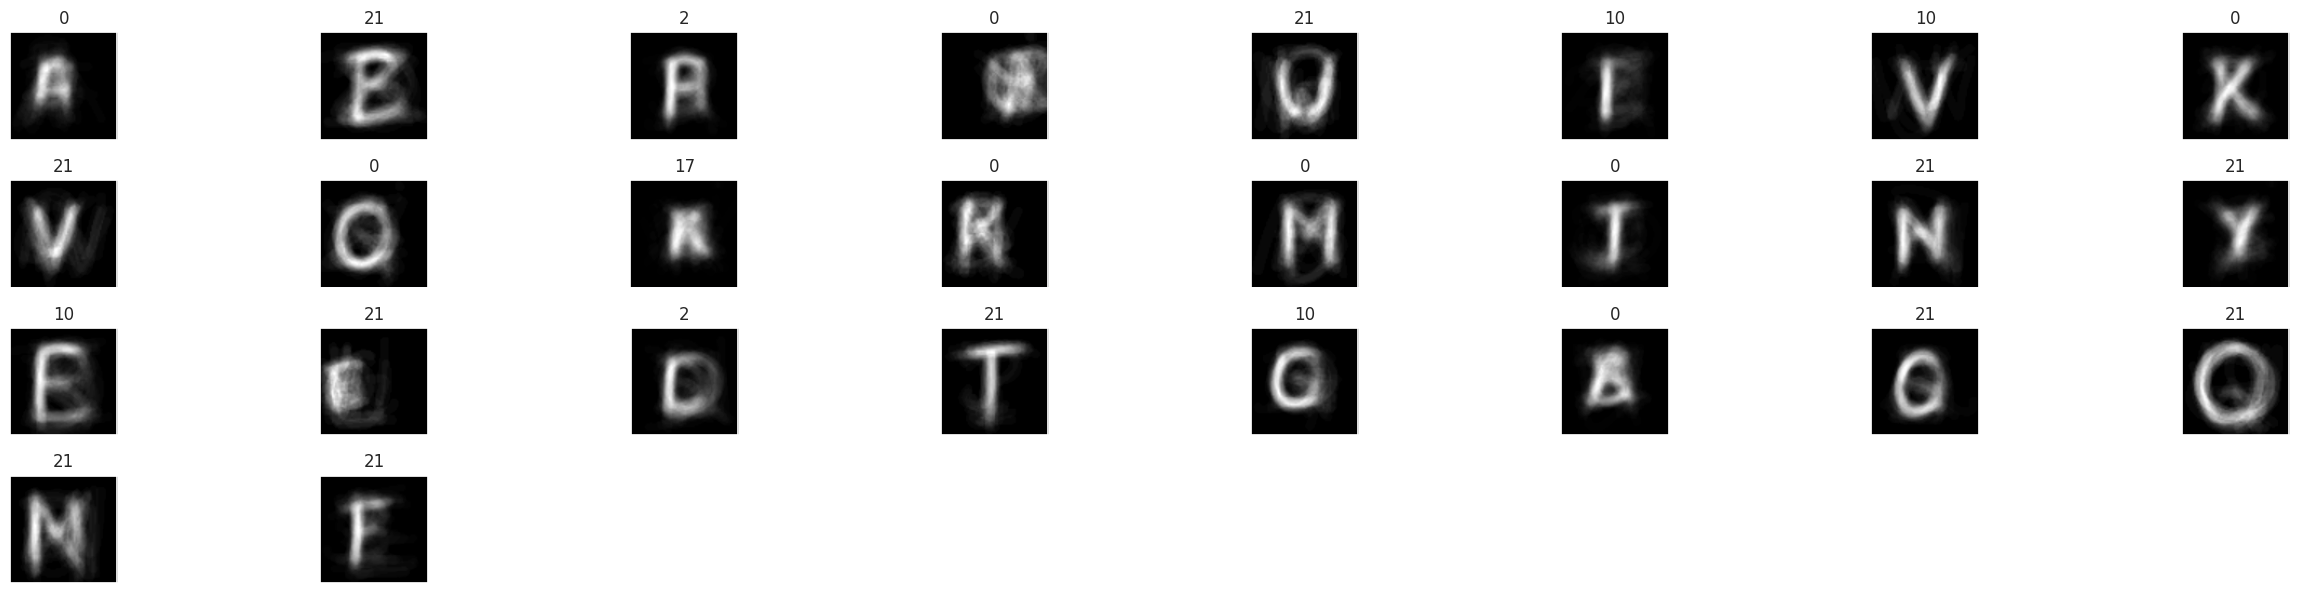

In [90]:
for i in range(num_classes):
    dim = np.sqrt(num_classes)
    plt.subplot(8, 8, 1 + i)
    plt.imshow(estimador.cluster_centers_[i].reshape((100,100)), cmap=plt.cm.binary)
    plt.title(estimador.labels_[i])
    ax= plt.gca()
    ax.get_yaxis().set_visible(False)
    ax.get_xaxis().set_visible(False)
plt.tight_layout()
plt.show()

Avaliando o desempenho da terefa de classificação não-supervisionada através da métrica silhouette score:

In [91]:
silhouette = metrics.silhouette_score(treinoFeatures, estimador.labels_)
silhouette

0.03409429334901212

/home/pedro/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


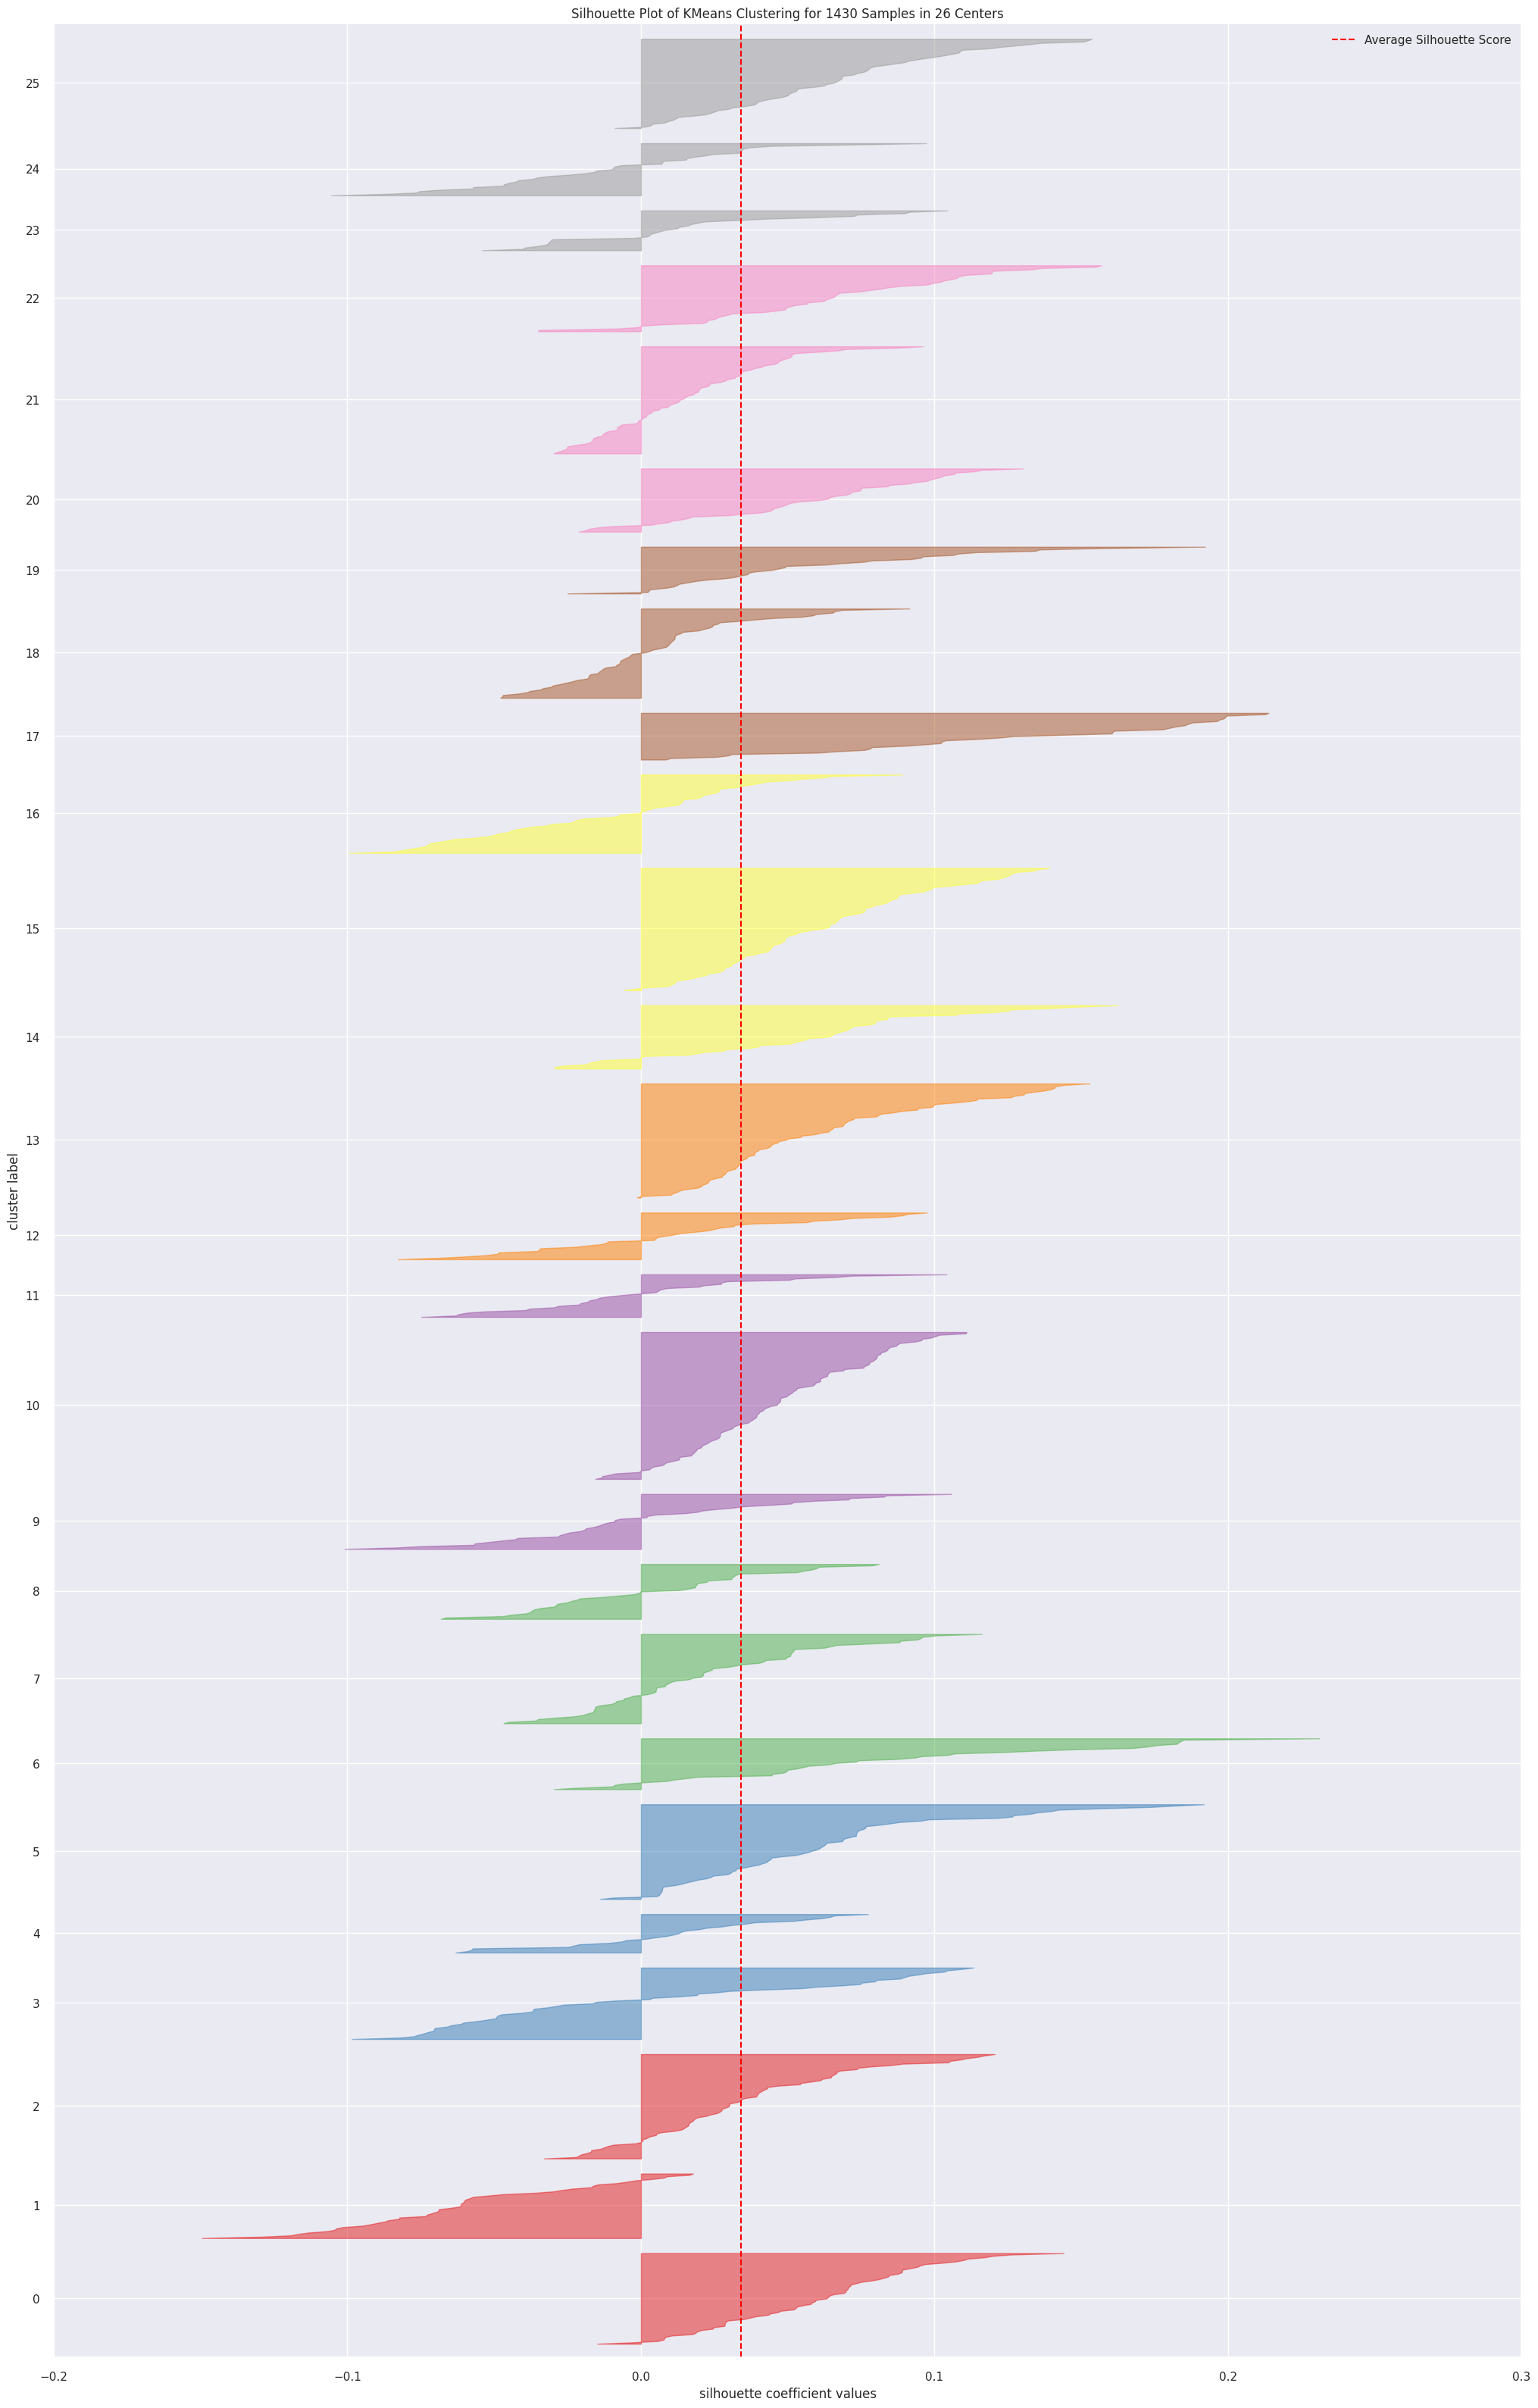

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 1430 Samples in 26 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [92]:
from yellowbrick.cluster import SilhouetteVisualizer
fig = plt.figure(figsize=(25,40))
visualizer = SilhouetteVisualizer(estimador,ax=fig.gca())
visualizer.fit(treinoFeatures)
visualizer.show()

## 6 - Classificar novas instâncias

In [93]:
from PIL import ImageTk, Image, ImageDraw, ImageOps
import PIL
from tkinter import ttk
from tkinter import *
import tkinter as tk
import cv2
import matplotlib.pyplot as plt
from typing import Tuple

In [94]:
def run_test():
    width = 100 # canvas width
    height = 100 # canvas height
    center = height//2
    white = (255, 255, 255) # canvas back

    LARGE_FONT= ("Verdana", 12)
    NORM_FONT= ("Verdana", 10)
    SMALL_FONT= ("Verdana", 8)

    def classify():
        image = np.array(output_image)
        grey_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        cropped = zoom(resize_with_pad(grey_image, (100,100)), 1.5)[25:125,25:125]
        a_image = np.array(cropped).flatten()
        prediction = le.inverse_transform(model.predict([a_image]))
        response = f'Dígito identificado: {prediction}'
        popupmsg(response)

    def new_drawing():
        canvas.delete('all')

    def crop_image(filename, pixel_value=255):
        gray = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
        crop_rows = gray[~np.all(gray == pixel_value, axis=1), :]
        cropped_image = crop_rows[:, ~np.all(crop_rows == pixel_value, axis=0)]
        return cropped_image

    def resize_with_pad(image: np.array, 
                        new_shape: Tuple[int, int], 
                        padding_color: Tuple[int] = (255, 255, 255)):
        original_shape = (image.shape[1], image.shape[0])
        ratio = float(max(new_shape))/max(original_shape)
        new_size = tuple([int(x*ratio) for x in original_shape])
        image = cv2.resize(image, new_size)
        delta_w = new_shape[0] - new_size[0]
        delta_h = new_shape[1] - new_size[1]
        top, bottom = delta_h//2, delta_h-(delta_h//2)
        left, right = delta_w//2, delta_w-(delta_w//2)
        image = cv2.copyMakeBorder(image, top, bottom, left, right, cv2.BORDER_CONSTANT, value=padding_color)
        return image

    def zoom(img, zoom_factor=1.2):
        return cv2.resize(img, None, fx=zoom_factor, fy=zoom_factor)

    def popupmsg(msg):
        popup = tk.Tk()
        popup.wm_title("Voc digitou:")
        label = ttk.Label(popup, text=msg, font=NORM_FONT)
        label.pack(side="top", fill="x", pady=10)
        B1 = ttk.Button(popup, text="Okay", command = popup.destroy)
        B1.pack()
        popup.mainloop()

    def paint(event):
        x1, y1 = (event.x - 1), (event.y - 1)
        x2, y2 = (event.x + 1), (event.y + 1)
        canvas.create_oval(x1, y1, x2, y2, fill="black",width=5)
        draw.line([x1, y1, x2, y2],fill="black",width=5)

    master = tk.Tk()

    # create a tkinter canvas to draw on
    canvas = Canvas(master, width=width, height=height, bg='white')
    canvas.pack()

    # create an empty PIL image and draw object to draw on
    output_image = PIL.Image.new("RGB", (width, height), white)
    draw = ImageDraw.Draw(output_image)
    canvas.pack(expand=YES, fill=BOTH)
    canvas.bind("<B1-Motion>", paint)

    # add a button to save the image
    button=Button(text="classify",command=classify)
    button.pack()

    button2=Button(text="clear",command=new_drawing)
    button2.pack()

    master.mainloop()

In [95]:
run_test()